## APS2 - TRANSFERÊNCIA DE CALOR E MECÂNICA DOS SÓLIDOS
Grupo: Fernando Fincatti, Gabriela Moreno, Lais Nascimento, Theo Barbara;

---

### Questão 1
---

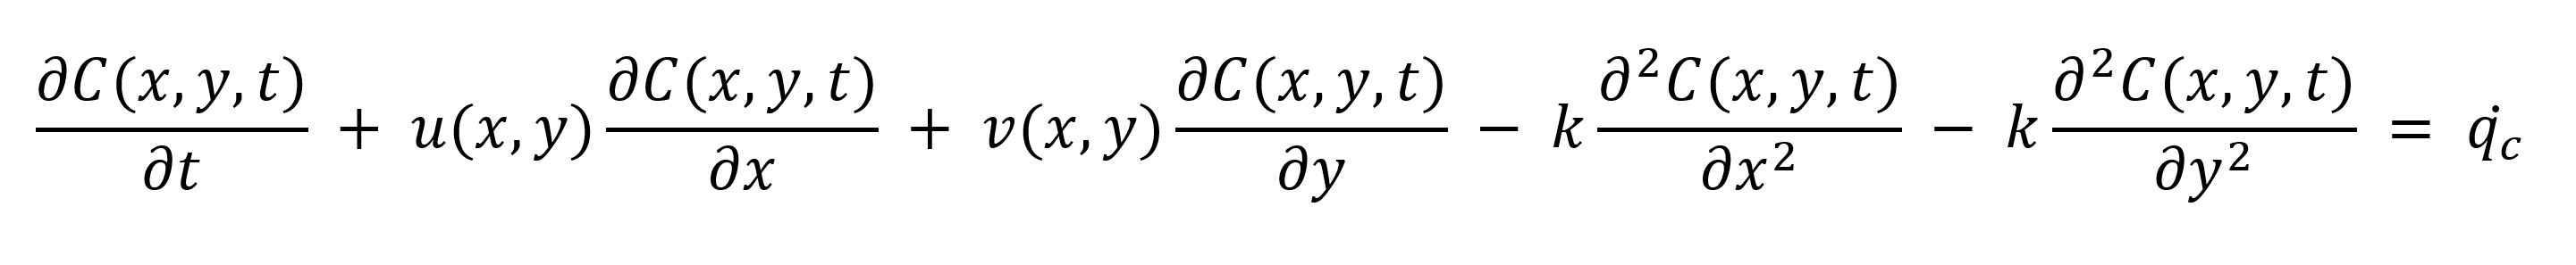

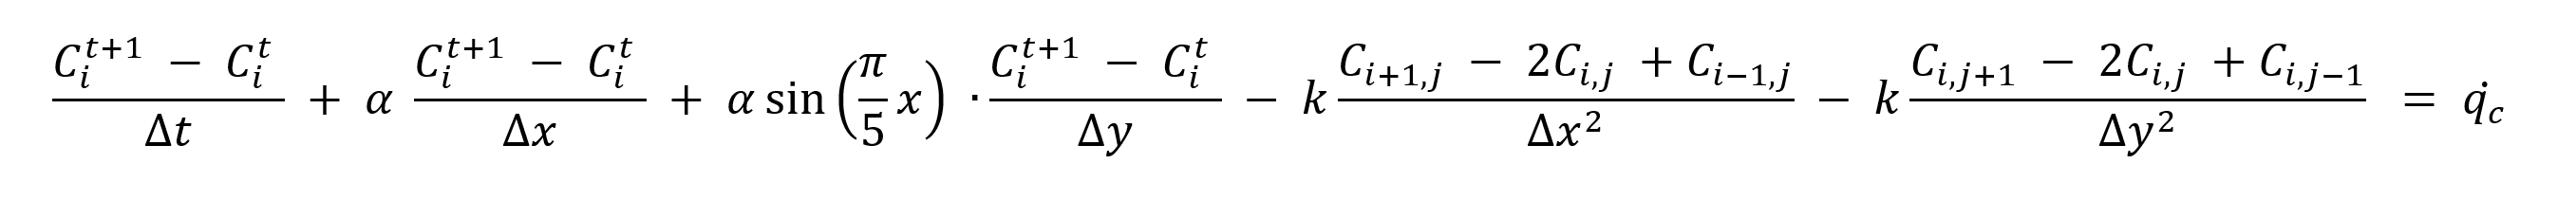

### Questão 2
---

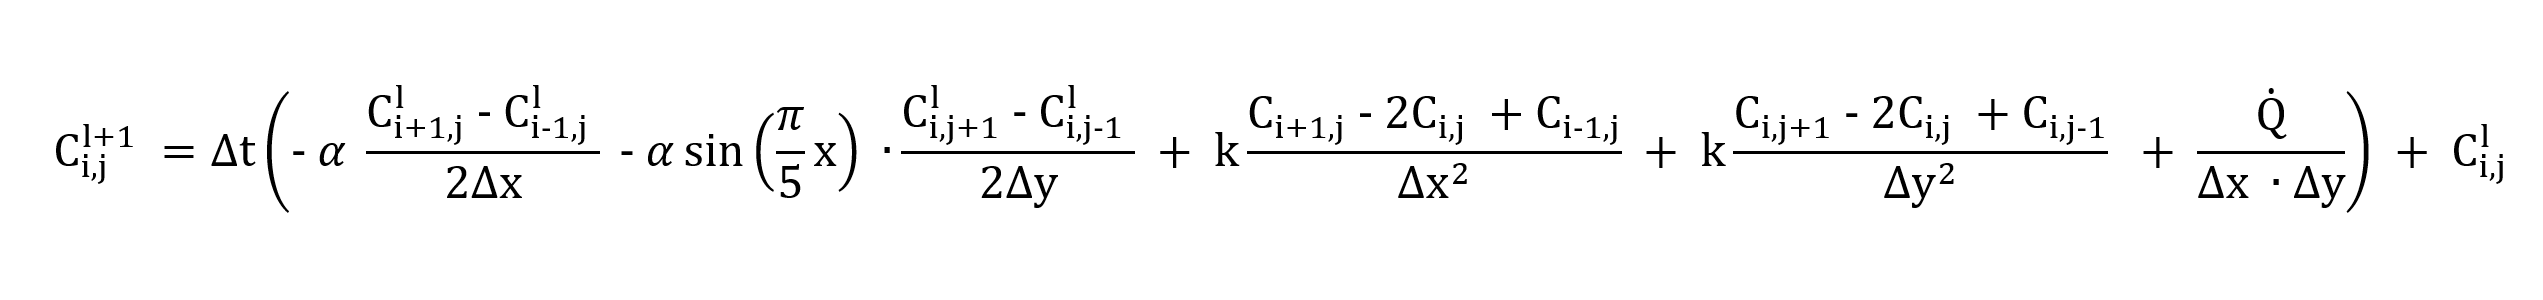

### Importando as bibliotecas
---

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from tqdm import tqdm

### Declarando varíaveis
---

In [2]:
n = 2              #nº do grupo
k = 1              #m^2/s
alpha = 1          #m/s
T = 3              #s
Q = 100            #kg/ms
lx = 30            #m
ly = 20            #m
a = int(n/1.4)     #xxx
b = int(60/(n+5))  #xxx
tempo = T*10       #s
delta_t = 0.05     #s
delta_x = 0.5      #m
delta_y = delta_x  #m
time = np.arange(0, tempo + delta_t, delta_t) #dimensão do tempo 
pontos_x = int(lx/delta_x)
pontos_y = int(ly/delta_y)

In [3]:
#teste de convergência
print("Satisfaz condição de convergência: {0}".format((delta_t/delta_x**2) < (1/(4*k))))

Satisfaz condição de convergência: True


## Funções de auxílio
---

In [4]:
def equacao_concentracao(y, x, l_c_mais_1, l_c_menos_1, l_mais_1_c, l_menos_1_c, l_c, t, k):
        
    #calcula o primeiro termo
    primeiro_termo = -alpha*(l_c_mais_1 - l_c_menos_1)/(2*delta_x)
    
    #calcula o segundo termo
    segundo_termo = alpha*sin( (pi*x)/5 )*(l_mais_1_c - l_menos_1_c)/(2*delta_y)
    
    #calcula o terceiro termo
    terceiro_termo = k*(l_c_mais_1 - 2*l_c + l_c_menos_1)/(delta_x**2)
    
    #calcula o quarto termo
    quarto_termo = k*(l_mais_1_c - 2*l_c + l_menos_1_c)/(delta_y**2)
    
    # Para a posição (a,b) para tempos menores de 3 segundos tem derramamento Q. !=0
    if t <= T:
        if(y == (pontos_y/ly)*b and x == (pontos_x/lx)*a):
            quinto_termo = Q/(delta_x*delta_y)
    
    # Se não obdece essas condições tem que desconsiderar o quinto termo que colocamos na função?
        else:
            quinto_termo = 0
    else:
        quinto_termo = 0
    #calcula a resposta final
    resposta = delta_t*(primeiro_termo + segundo_termo + terceiro_termo + quarto_termo + quinto_termo) + l_c
    
    return resposta

In [5]:
def calcula_dispersao(k):
    rio = np.zeros((pontos_y, pontos_x)) #matriz inicial
    rio_disp = np.copy(rio) #aplica dispersão
    for t1 in tqdm(time):
        for l in range(1, pontos_y-1):
            for c in range(1, pontos_x-1):
                rio_disp[l][c] = equacao_concentracao(l, 
                                                      c,
                                                      rio[l][c+1],
                                                      rio[l][c-1],
                                                      rio[l+1][c],
                                                      rio[l-1][c],
                                                      rio[l][c],
                                                      t1,
                                                      k)
                if rio_disp[l][c] < 0:
                    rio_disp = 0
                    
        rio = np.copy(rio_disp)
        rio_disp[0,:] = rio_disp[1,:] #primeira linha é igual a segunda
        rio_disp[-1,:] = rio_disp[-2,:] #última linha é igual a penúltima
        rio_disp[:,0] = rio_disp[:,1] #primeira coluna é igual a segunda
        rio_disp[:,-1] = rio_disp[:,-2] #última coluna é igual a penúltima
    
    fig, ax = plt.subplots()
    plt.imshow(rio_disp, cmap='viridis', extent=[0,30,0,20], origin="lower")
    plt.colorbar()
    plt.title("Último Instante com k = {0}".format(k))
    plt.show()
    plt.figure()
            
    return rio_disp

## Calculando a dispersão
---

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:11<00:00, 54.15it/s]


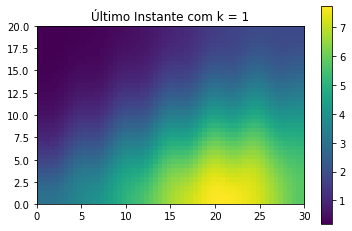

<Figure size 432x288 with 0 Axes>

In [6]:
rio = calcula_dispersao(k)

### Questão 4
---


In [7]:
ks = [0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.1, 1.2]

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:10<00:00, 55.54it/s]


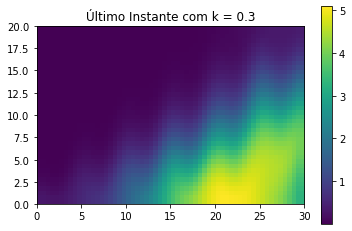

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:12<00:00, 49.60it/s]


<Figure size 432x288 with 0 Axes>

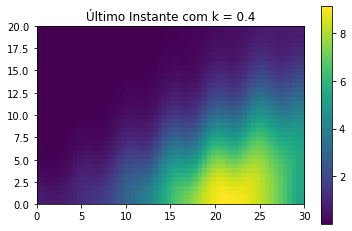

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:11<00:00, 51.52it/s]


<Figure size 432x288 with 0 Axes>

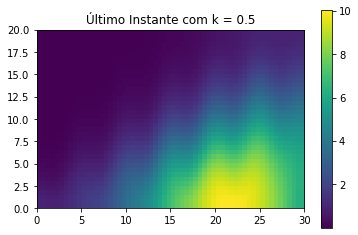

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:12<00:00, 49.32it/s]


<Figure size 432x288 with 0 Axes>

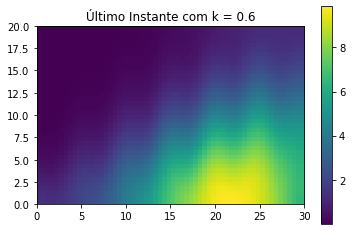

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:12<00:00, 49.00it/s]


<Figure size 432x288 with 0 Axes>

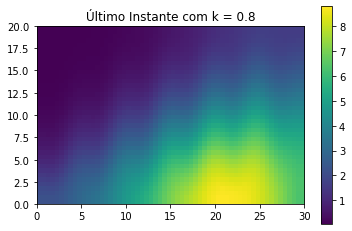

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:12<00:00, 47.94it/s]


<Figure size 432x288 with 0 Axes>

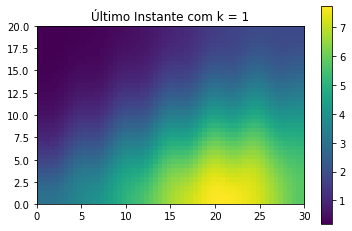

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:11<00:00, 50.63it/s]


<Figure size 432x288 with 0 Axes>

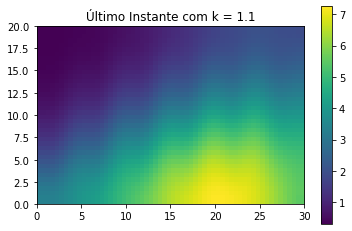

100%|████████████████████████████████████████████████████████████████████████████████| 601/601 [00:12<00:00, 48.20it/s]


<Figure size 432x288 with 0 Axes>

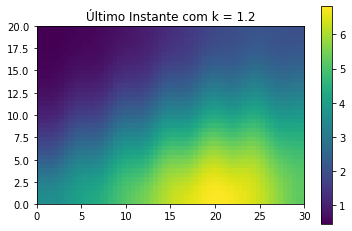

<Figure size 432x288 with 0 Axes>

In [8]:
for k in ks:
    rio_teste = calcula_dispersao(k)

Ao observar as imagens acima, que foram contruídas com o cáculo da difusão de um poluente em um rio com correnteza com um valores de  coeficiente de difusão K diferentes do que foi usado anteriormente. Percebemos que, para valores de k menores o transporte desse poluente para o restante do rio também é menor, ficando mais "concentrado". Já para valores de K maiores, é possível notar que há uma difusão maior, o poluente já não está mais com uma contração tão alta em apenas um determinado ponto, grande parte do rio já está contaminado.

### Questão 5
---

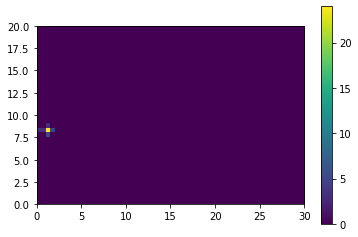

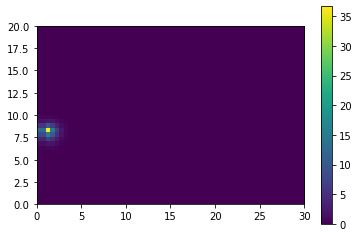

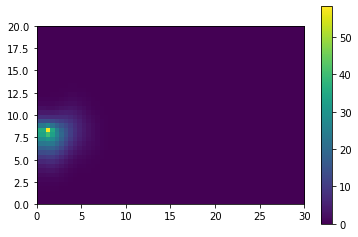

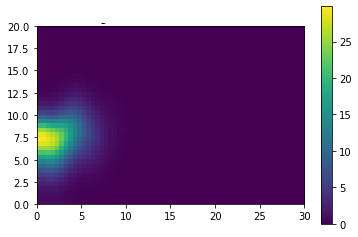

Como apresentado nas imagens acima, podemos dizer que a primeira fronteira a ser atingida pelo poluente, ou seja, com concentração maior que 0, é a borda esquerda. Isso pode ser justificado pelo fato de que o ponto de derramamento do poluente p(a,b) está muito próximo da fronteira esquerda, sendo a, b, 1 e 8, respectivamente. 